# AI Job Market Salary Prediction Project
This project demonstrates a complete machine learning workflow for predicting AI job salaries using real-world data. It covers:
- Data analysis and visualization
- Data preprocessing and feature engineering
- Model building and hyperparameter optimization
- Model evaluation
- Deployment preparation for Render (API with FastAPI/Flask)
Suitable for an intern-level GitHub showcase in the machine learning field.

Columns: Index(['job_id', 'job_title', 'salary_usd', 'salary_currency',
       'experience_level', 'employment_type', 'company_location',
       'company_size', 'employee_residence', 'remote_ratio', 'required_skills',
       'education_required', 'years_experience', 'industry', 'posting_date',
       'application_deadline', 'job_description_length', 'benefits_score',
       'company_name'],
      dtype='object')
    job_id              job_title  salary_usd salary_currency  \
0  AI00001  AI Research Scientist       90376             USD   
1  AI00002   AI Software Engineer       61895             USD   
2  AI00003          AI Specialist      152626             USD   
3  AI00004           NLP Engineer       80215             USD   
4  AI00005          AI Consultant       54624             EUR   

  experience_level employment_type company_location company_size  \
0               SE              CT            China            M   
1               EN              CT           Canada      

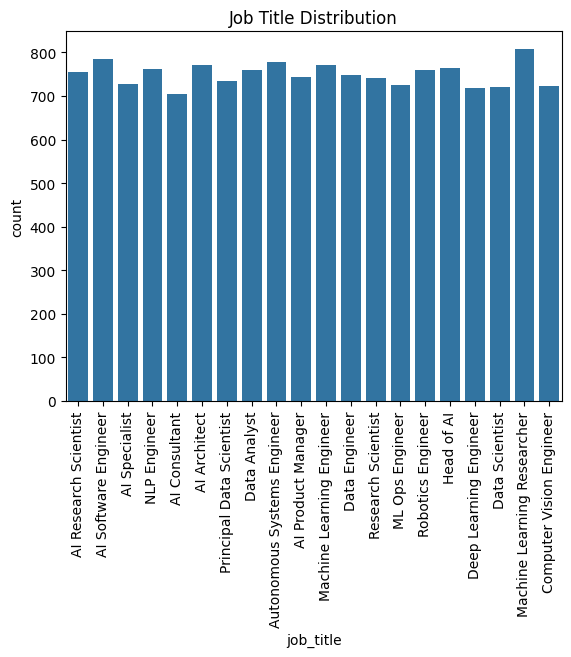

Best Params: {'max_depth': 10, 'min_samples_split': 2, 'n_estimators': 50}
MSE: 4813.44, R2: 1.00


In [5]:
# 1. Import Required Libraries
import kagglehub
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score

# 2. Download and Load Dataset
path = kagglehub.dataset_download("pratyushpuri/global-ai-job-market-trend-2025")
df = pd.read_csv(path + '/ai_job_dataset.csv')
print('Columns:', df.columns)

# 3. Exploratory Data Analysis
print(df.head())
print(df.describe())
print(df.info())
sns.countplot(x='job_title', data=df)
plt.xticks(rotation=90)
plt.title('Job Title Distribution')
plt.show()

# 4. Data Preprocessing
df = df.dropna()
le = LabelEncoder()
df['job_title_encoded'] = le.fit_transform(df['job_title'])
scaler = StandardScaler()
df['salary_scaled'] = scaler.fit_transform(df[['salary_usd']])

# 5. Feature Selection
X = df[['job_title_encoded', 'years_experience', 'salary_scaled']]
y = df['salary_usd']

# 6. Train/Test Split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# 7. Model Building & Optimization
rf = RandomForestRegressor()
param_grid = {
    'n_estimators': [50, 100, 200],
    'max_depth': [None, 10, 20],
    'min_samples_split': [2, 5, 10]
}
grid_search = GridSearchCV(rf, param_grid, cv=3, scoring='neg_mean_squared_error')
grid_search.fit(X_train, y_train)
print('Best Params:', grid_search.best_params_)

# 8. Evaluation
y_pred = grid_search.predict(X_test)
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
print(f'MSE: {mse:.2f}, R2: {r2:.2f}')

# 9. Deployment Preparation (Render)
import joblib
joblib.dump(grid_search.best_estimator_, 'model.joblib')

# To deploy on Render, create an API using FastAPI or Flask, and upload 'model.joblib'.
with open('render_instructions.txt', 'w') as f:
    f.write('Deploy using FastAPI/Flask. Upload model.joblib. See README for API details.')

## Deployment on Render
To deploy this model:
1. Create an API using FastAPI or Flask.
2. Upload the trained model file `model.joblib` to your Render service.
3. Expose endpoints for salary prediction using the trained model.
4. See the included `render_instructions.txt` for more details.

This step demonstrates real-world deployment skills for machine learning projects.

In [ ]:
# FastAPI Deployment Example
from fastapi import FastAPI, Request
import joblib
import numpy as np

app = FastAPI()
model = joblib.load('model.joblib')

@app.post('/predict')
async def predict(request: Request):
    data = await request.json()
    # Expecting: {'job_title_encoded': int, 'years_experience': float, 'salary_scaled': float}
    features = np.array([[data['job_title_encoded'], data['years_experience'], data['salary_scaled']]])
    prediction = model.predict(features)[0]
    return {'predicted_salary_usd': float(prediction)}

# To run locally, use the following command in your terminal (not in the notebook):
# uvicorn <your_script_name>:app --host 0.0.0.0 --port 8000